In [1]:
import scipy.io

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy.stats as stats

In [2]:
"""
Load the .mat file with the training and validation data
"""
try:
    achse_mat = scipy.io.loadmat('ZeMA_Matlab/Achse11_Szenario.mat')
except FileNotFoundError:
    achse_mat = scipy.io.loadmat('/data/vedurm01/Achse11_Szenario.mat')

#extract the training data and target values. note the weird matlab formatting

trainData = achse_mat['trainData']

c:\users\vedurm01\pycharmprojects\zema_ml\venv\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [3]:
import numpy as np
trainData_reshaped = []
for counter, val in enumerate(trainData):
    trainData_reshaped+=[val[0]]
trainData_reshaped = np.array(trainData_reshaped)

In [4]:
sensormes=pd.DataFrame(trainData_reshaped[:,3,:].T)

In [5]:
ttarget=achse_mat['trainTarget'].reshape(-1)

In [6]:
df_ttarget = pd.DataFrame(ttarget)

In [7]:
df_ttarget[0].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=uint8)

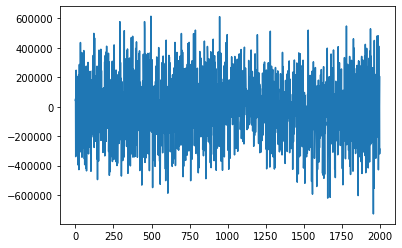

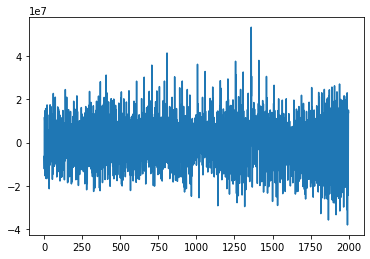

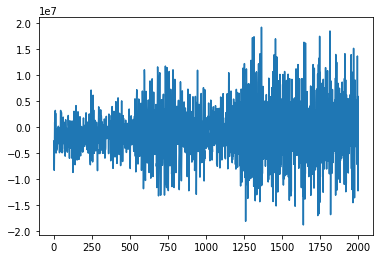

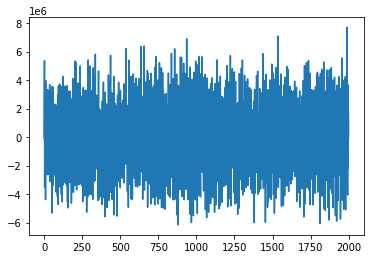

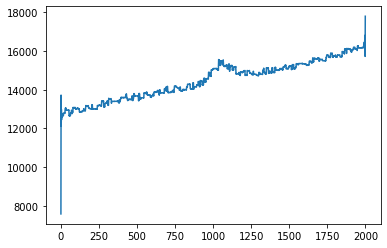

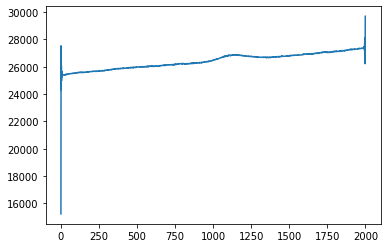

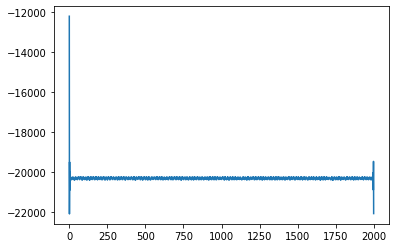

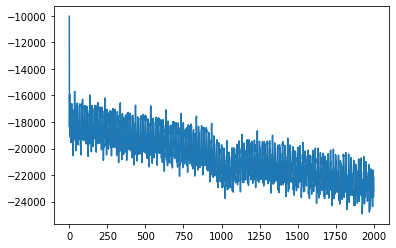

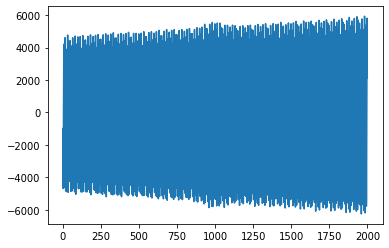

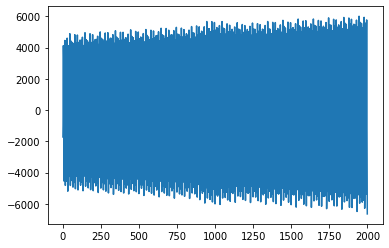

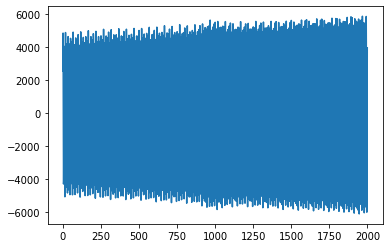

In [25]:
for k in range(11):
    plt.figure()
    plt.plot(trainData_reshaped[k,0,:])

In [7]:
df_temp=pd.DataFrame(trainData_reshaped[:,0,:].T, columns=['Sensor '+str(k+1) for k in range(11)])

In [8]:
df_temp.corr()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11
Sensor 1,1.000000,-0.449189,0.004049,-0.231817,0.002497,-0.001853,-0.002445,0.033102,0.024144,0.119028,-0.141164
Sensor 2,-0.449189,1.000000,-0.039985,0.412509,-0.010821,-0.006975,0.005889,-0.017719,0.052520,0.020036,-0.076117
Sensor 3,0.004049,-0.039985,1.000000,-0.018123,0.101877,0.101892,-0.028220,-0.073391,0.075445,0.011577,-0.086541
Sensor 4,-0.231817,0.412509,-0.018123,1.000000,0.001219,-0.000954,-0.002840,0.061951,-0.028267,-0.012787,0.040508
Sensor 5,0.002497,-0.010821,0.101877,0.001219,1.000000,0.945771,-0.159529,-0.802596,0.006583,-0.003679,-0.003492
Sensor 6,-0.001853,-0.006975,0.101892,-0.000954,0.945771,1.000000,-0.424952,-0.767223,0.003810,-0.001974,-0.002608
Sensor 7,-0.002445,0.005889,-0.028220,-0.002840,-0.159529,-0.424952,1.000000,0.006716,0.009416,0.011362,-0.019275
Sensor 8,0.033102,-0.017719,-0.073391,0.061951,-0.802596,-0.767223,0.006716,1.000000,-0.082035,-0.024309,0.106842
Sensor 9,0.024144,0.052520,0.075445,-0.028267,0.006583,0.003810,0.009416,-0.082035,1.000000,-0.500350,-0.503998
Sensor 10,0.119028,0.020036,0.011577,-0.012787,-0.003679,-0.001974,0.011362,-0.024309,-0.500350,1.000000,-0.495460


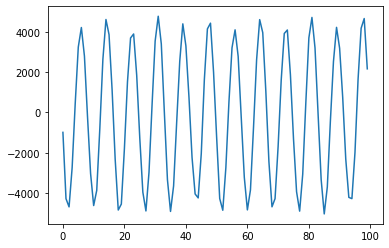

In [12]:
plt.plot(trainData_reshaped[8,0,:100])

In [9]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

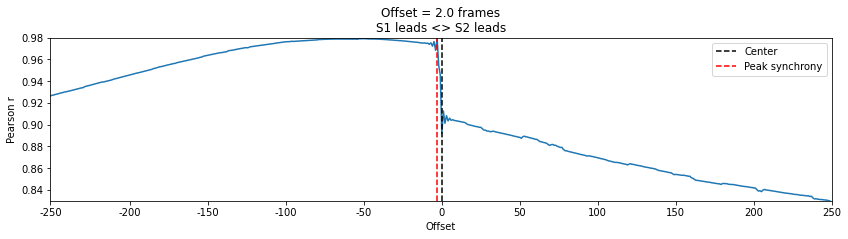

In [15]:
d1 = df_temp['Sensor 5']
d2 = df_temp['Sensor 6']
seconds = 5
fps = 50
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[np.round(np.min(rs), 2),np.round(np.max(rs)+.005,2)],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501])
ax.set_xticklabels([-250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250])
plt.legend()

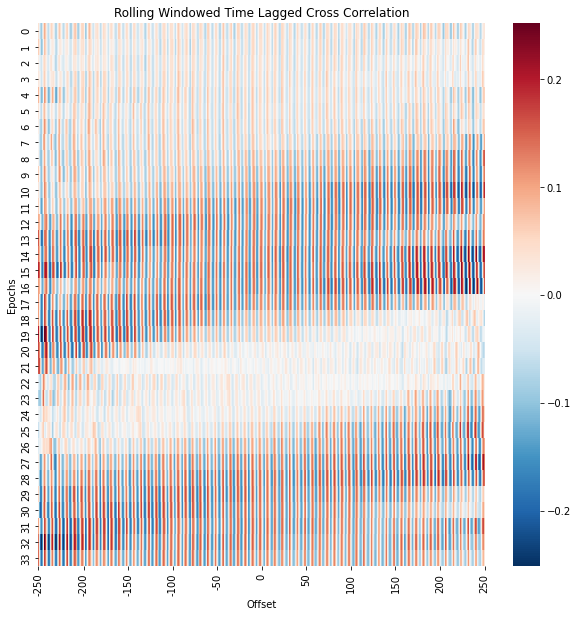

In [47]:
seconds = 5
fps = 50
window_size = 300 #samples
t_start = 0
t_end = t_start + window_size
step_size = 50
rss=[]
while t_end < 2000:
    d1 = df_temp['Sensor 2'].iloc[t_start:t_end]
    d2 = df_temp['Sensor 9'].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    rss.append(rs) 
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Epochs')
ax.set_xticks([0, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501])
ax.set_xticklabels([-250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250]);

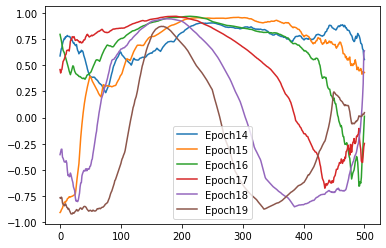

In [45]:
for k in range(14,20):
    plt.plot(rss.iloc[k,:], label='Epoch'+str(k))
plt.legend()

In [43]:
rss.iloc[:,12]

0     0.174662
1     0.735642
2    -0.547729
3     0.016463
4     0.436381
5     0.441416
6    -0.064066
7     0.618791
8    -0.477240
9     0.338091
10    0.371430
11    0.225284
12    0.484762
13    0.226213
14    0.785421
15   -0.776805
16    0.514682
17    0.644316
18   -0.503939
19   -0.861254
20   -0.718185
21    0.577335
22   -0.698385
23    0.494683
24   -0.440774
25   -0.004097
26    0.743231
27   -0.148238
28    0.453422
29    0.289682
30    0.548506
31   -0.034465
32    0.749121
33    0.170415
Name: 12, dtype: float64